**Read data into worksheet**

In [ ]:

import pandas as pd

df_orders_2017 = pd.read_csv('orders_2017.csv')
df_orders_2018 = pd.read_csv('orders_2018.csv')
df_orders_2019 = pd.read_csv('orders_2019.csv')
sales_reps = pd.read_csv('sales_reps.csv')

**Concatenating dataframes**

Before concatenating to get all 3 years orders, we check if column names are consistent

In [ ]:

if set(df_orders_2017.columns) == set(df_orders_2018.columns) == set(df_orders_2019.columns):
    print("Column names are the same across all dataframes.")
else:
    print("Column names are not the same across all dataframes.")

Column names are not the same across all dataframes.


Lets check exactly which column names are different

In [ ]:

print("Column names for df_orders_2017:", df_orders_2017.columns.tolist())
print("Column names for df_orders_2018:", df_orders_2018.columns.tolist())
print("Column names for df_orders_2019:", df_orders_2019.columns.tolist())

Column names for df_orders_2017: ['Unnamed: 0', 'order_id', 'order_date', 'dhip_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country_segment', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']
Column names for df_orders_2018: ['Unnamed: 0', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'county_region', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']
Column names for df_orders_2019: ['Unnamed: 0', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country_region', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


There are two issues:
1. 'ship_date' in orders 2017 replaces the 's' with a 'd'.
2. country_segment in 2017, county_region in 2018, and country_region in 2019 are suspected to be the same column. Lets ensure, then standradise the column names.

1. Rename 'dhip_date' in 2017 to 'ship_date'

In [ ]:

df_orders_2017.rename(columns={'dhip_date': 'ship_date'}, inplace=True)

2. Lets check country_region in 2018, county_region in 2019, and country_segment in 2017 are the same

In [ ]:

print(df_orders_2017['country_segment'].unique())
print(df_orders_2018['county_region'].unique())
print(df_orders_2019['country_region'].unique())

['United States']
['United States']
['United States']


Lets ensure consistent datatypes

In [ ]:

print(df_orders_2017.dtypes)
print(df_orders_2018.dtypes)
df_orders_2019.dtypes

Unnamed: 0           int64
order_id            object
order_date          object
ship_date           object
ship_mode           object
customer_id         object
customer_name       object
segment             object
country_segment     object
city                object
state               object
postal_code        float64
region              object
product_id          object
category            object
sub_category        object
product_name        object
sales              float64
quantity             int64
discount           float64
profit              object
dtype: object
Unnamed: 0         int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
county_region     object
city              object
state             object
postal_code      float64
region            object
product_id        object
category          object
sub_category      object
product_name      o

,0
Unnamed: 0,int64
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country_region,object
city,object


Lets rename all to country

In [ ]:

df_orders_2017.rename(columns={'country_segment': 'country'}, inplace=True)
df_orders_2018.rename(columns={'county_region': 'country'}, inplace=True)
df_orders_2019.rename(columns={'country_region': 'country'}, inplace=True)

Finally, concatenate into one dataframe and save a copy of the df

In [ ]:

df_all_years = pd.concat([df_orders_2017, df_orders_2018, df_orders_2019], ignore_index=True)

# Display the first few rows of the combined dataframe
print(df_all_years.head())

# Display information about the combined dataframe (number of rows, columns, dtypes, etc.)
print(df_all_years.info())


   Unnamed: 0        order_id  order_date   ship_date       ship_mode  \
0           0  US-2017-108966  2017-10-11  2017-10-18  Standard Class   
1           1  US-2017-108966  2017-10-11  2017-10-18  Standard Class   
2           2  US-2017-118983  2017-11-22  2017-11-26  Standard Class   
3           3  US-2017-118983  2017-11-22  2017-11-26  Standard Class   
4           4  CA-2017-106320  2017-09-25  2017-09-30  Standard Class   

  customer_id   customer_name      segment        country             city  \
0    SO-20335  Sean O'Donnell     Consumer  United States  Fort Lauderdale   
1    SO-20335  Sean O'Donnell     Consumer  United States  Fort Lauderdale   
2    HP-14815   Harold Pawlan  Home Office  United States       Fort Worth   
3    HP-14815   Harold Pawlan  Home Office  United States       Fort Worth   
4    EB-13870     Emily Burns     Consumer  United States             Orem   

   ... postal_code   region       product_id         category sub_category  \
0  ...     333

In [ ]:

df_all_years_copy = df_all_years.copy()

The story of one row:

each row represents a unique product ordered in an order. Therefore, product id can repeat, and cannot be used as a PK. Lets make a primary key 'product_ordered_id

In [ ]:

df_all_years['product_ordered_id'] = range(1, len(df_all_years) + 1)

**Initial exploration**


In [ ]:
print(df_all_years.shape)
print(df_all_years.columns)

(8001, 22)
Index(['Unnamed: 0', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'product_ordered_id'],
      dtype='object')


There is an irrelevant column 'Unamed: 0' we can delete

In [ ]:

df_all_years = df_all_years.drop(columns=['Unnamed: 0'])

'country' is all the same, so delete column

In [ ]:

df_all_years = df_all_years.drop(columns=['country'])

Examine nulls
- 11 nulls in postal_code

In [ ]:

print(df_all_years.isnull().sum())

order_id               0
order_date             0
ship_date              0
ship_mode              0
customer_id            0
customer_name          0
segment                0
city                   0
state                  0
postal_code           11
region                 0
product_id             0
category               0
sub_category           0
product_name           0
sales                  0
quantity               0
discount               0
profit                 0
product_ordered_id     0
dtype: int64


Lets impute the nulls with the postal code most common in the city of the record

In [ ]:

# Group by 'city' and find the most common 'postal_code' for each city
city_postal_code_mode = df_all_years.groupby('city')['postal_code'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Impute the missing 'postal_code' values based on the 'city'
df_all_years['postal_code'] = df_all_years.apply(
    lambda row: city_postal_code_mode[row['city']] if pd.isnull(row['postal_code']) and row['city'] in city_postal_code_mode else row['postal_code'],
    axis=1
)

# Verify if there are any remaining nulls in 'postal_code'
print("\nNull values after imputation:")
print(df_all_years.isnull().sum())



Null values after imputation:
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
postal_code           0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
product_ordered_id    0
dtype: int64


Data types are all consistent, for now
We can pay more attention to this in Power BI at a later stage, in data formatting for best reporting practices

In [ ]:

df_all_years.dtypes

,0
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
city,object
state,object
postal_code,float64


**Schema modelling**

Schema model most apprpriate for the data is a 'snowflake' schema, with one fact table, and related dimension tables with levels of granularity.

Key perks of using a snowflake schema in Power BI:

Lean data model – normalising dimensions removes duplicate attribute columns, shrinking memory footprint and speeding up refreshes.

Centralised attributes – each real-world concept lives in one table, so fixes or new columns are made once and flow everywhere.

Clearer relationships – smaller, purpose-built tables reduce many-to-one ambiguities and make role-playing dimensions (e.g., Order Date vs. Ship Date) straightforward.

Granular security – row-level security rules can target the most specific dimension table instead of a wide, denormalised one.

Faster incremental loads – when only one branch of the snowflake changes, you refresh that slice instead of re-processing a bulky star dimension.

Better hierarchy handling – natural drill paths (Country → State → City) are already split across tables, making hierarchy visuals easier to build.

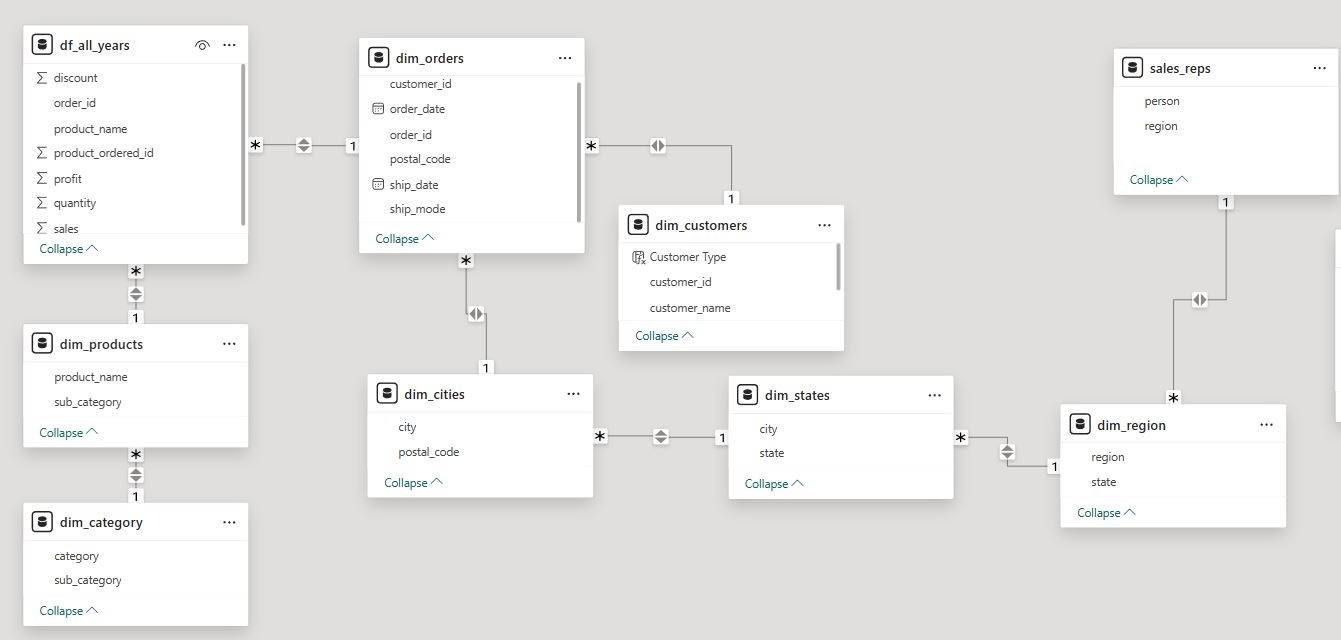

A hirearchy of tables for geographies will be created for each level of granularity, for example postal_code --> city --> state --> region. They will be linked to the orders table.
- For that, lets anwer:
1. Does each postal code have a unique city?
2. Does each city have a unique state?
3. Does each state have a unique region?

1. Does each postal code have a unique city?

In [ ]:

# Group by postal_code and check the number of unique cities for each postal code
postal_code_city_counts = df_all_years.groupby('postal_code')['city'].nunique()

# Check if any postal code has more than one unique city
if (postal_code_city_counts > 1).any():
    print("No, each postal code does not have a unique city.")
    # Optionally, you can print the postal codes that have multiple cities
    print("\nPostal codes with multiple cities:")
    print(postal_code_city_counts[postal_code_city_counts > 1])
else:
    print("Yes, each postal code has a unique city.")

No, each postal code does not have a unique city.

Postal codes with multiple cities:
postal_code
92024.0    2
Name: city, dtype: int64


1.  Encinitas and San Diego share the 92024.0 postal code. For the purposes of simplicity, lets delte the Encinitas instances

In [ ]:

df_all_years = df_all_years[
    ~((df_all_years['postal_code'] == 92024.0) & (df_all_years['city'] == 'Encinitas'))
]

2. Does each city have a unique state?

In [ ]:

# Group by city and check the number of unique states for each city
city_state_counts = df_all_years.groupby('city')['state'].nunique()

# Check if any city has more than one unique state
if (city_state_counts > 1).any():
    print("No, each city does not have a unique state.")
    # Optionally, you can print the cities that have multiple states and the states
    print("\nCities with multiple states:")
    cities_with_multiple_states = city_state_counts[city_state_counts > 1].index
    for city in cities_with_multiple_states:
        states_for_city = df_all_years[df_all_years['city'] == city]['state'].unique()
        print(f"City: {city}, States: {list(states_for_city)}")
else:
    print("Yes, each city has a unique state.")

No, each city does not have a unique state.

Cities with multiple states:
City: Apple Valley, States: ['California', 'Minnesota']
City: Arlington, States: ['Texas', 'Virginia']
City: Auburn, States: ['New York', 'Alabama', 'Washington']
City: Aurora, States: ['Colorado', 'Illinois']
City: Bloomington, States: ['Illinois', 'Indiana']
City: Bowling Green, States: ['Ohio', 'Kentucky']
City: Bristol, States: ['Tennessee', 'Connecticut']
City: Burlington, States: ['Vermont', 'North Carolina', 'Iowa']
City: Columbia, States: ['Tennessee', 'South Carolina', 'Maryland', 'Missouri']
City: Columbus, States: ['Ohio', 'Indiana', 'Georgia']
City: Concord, States: ['New Hampshire', 'North Carolina', 'California']
City: Danville, States: ['California', 'Illinois']
City: Decatur, States: ['Alabama', 'Illinois']
City: Des Moines, States: ['Washington', 'Iowa']
City: Dover, States: ['Delaware', 'New Hampshire']
City: Dublin, States: ['Ohio', 'California']
City: Everett, States: ['Massachusetts', 'Washin

2. Some cities are present in multiple states. To make cities unique, lets add an abbreviation reflecting the state they are in

In [ ]:

state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

df_all_years['city_state'] = df_all_years.apply(
    lambda row: f"{row['city']}, {state_abbreviations.get(row['state'], row['state'])}" if pd.notnull(row['city']) and pd.notnull(row['state']) else row['city'],
    axis=1
)

# Verify the changes
print(df_all_years[['city', 'state', 'city_state']].head())

# Check if each city_state now has a unique state
city_state_counts_new = df_all_years.groupby('city_state')['state'].nunique()

if (city_state_counts_new > 1).any():
    print("No, each city_state does not have a unique state after modification.")
    print("\nCity_States with multiple states:")
    city_states_with_multiple_states = city_state_counts_new[city_state_counts_new > 1].index
    for city_state in city_states_with_multiple_states:
        states_for_city_state = df_all_years[df_all_years['city_state'] == city_state]['state'].unique()
        print(f"City_State: {city_state}, States: {list(states_for_city_state)}")
else:
    print("Yes, each city_state has a unique state after modification.")

              city    state           city_state
0  Fort Lauderdale  Florida  Fort Lauderdale, FL
1  Fort Lauderdale  Florida  Fort Lauderdale, FL
2       Fort Worth    Texas       Fort Worth, TX
3       Fort Worth    Texas       Fort Worth, TX
4             Orem     Utah             Orem, UT
Yes, each city_state has a unique state after modification.


In [ ]:

df_all_years = df_all_years.drop(columns=['city'])
df_all_years.rename(columns={'city_state': 'city'}, inplace=True)

print(df_all_years.columns)
print(df_all_years[['city', 'state']].head())

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'product_ordered_id', 'city'],
      dtype='object')
                  city    state
0  Fort Lauderdale, FL  Florida
1  Fort Lauderdale, FL  Florida
2       Fort Worth, TX    Texas
3       Fort Worth, TX    Texas
4             Orem, UT     Utah


3. Does each state have a unique region?

In [ ]:

# Group by state and check the number of unique regions for each state
state_region_counts = df_all_years.groupby('state')['region'].nunique()

# Check if any state has more than one unique region
if (state_region_counts > 1).any():
    print("No, each state does not have a unique region.")
    # Optionally, you can print the states that have multiple regions and the regions
    print("\nStates with multiple regions:")
    states_with_multiple_regions = state_region_counts[state_region_counts > 1].index
    for state in states_with_multiple_regions:
        regions_for_state = df_all_years[df_all_years['state'] == state]['region'].unique()
        print(f"State: {state}, Regions: {list(regions_for_state)}")
else:
    print("Yes, each state has a unique region.")

Yes, each state has a unique region.


Create the dim_orders table

In [ ]:

dim_orders = df_all_years[['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'postal_code']].drop_duplicates().reset_index(drop=True)

# Display the first few rows of dim_orders
print(dim_orders.head())

# Display information about dim_orders
print(dim_orders.info())

         order_id  order_date   ship_date       ship_mode customer_id  \
0  US-2017-108966  2017-10-11  2017-10-18  Standard Class    SO-20335   
1  US-2017-118983  2017-11-22  2017-11-26  Standard Class    HP-14815   
2  CA-2017-106320  2017-09-25  2017-09-30  Standard Class    EB-13870   
3  US-2017-150630  2017-09-17  2017-09-21  Standard Class    TB-21520   
4  CA-2017-117415  2017-12-27  2017-12-31  Standard Class    SN-20710   

   postal_code  
0      33311.0  
1      76106.0  
2      84057.0  
3      19140.0  
4      77041.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     4038 non-null   object 
 1   order_date   4038 non-null   object 
 2   ship_date    4038 non-null   object 
 3   ship_mode    4038 non-null   object 
 4   customer_id  4038 non-null   object 
 5   postal_code  4038 non-null   float64
dtypes: float64(1

Create dim_cities table

In [ ]:

dim_cities = df_all_years[['postal_code', 'city']].drop_duplicates().reset_index(drop=True)

# Display the first few rows of dim_cities
print(dim_cities.head())

# Display information about dim_cities
print(dim_cities.info())

   postal_code                 city
0      33311.0  Fort Lauderdale, FL
1      76106.0       Fort Worth, TX
2      84057.0             Orem, UT
3      19140.0     Philadelphia, PA
4      77041.0          Houston, TX
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   postal_code  602 non-null    float64
 1   city         602 non-null    object 
dtypes: float64(1), object(1)
memory usage: 9.5+ KB
None


In [ ]:

# Identify postal codes that appear more than once in dim_cities
duplicate_postal_codes = dim_cities[dim_cities.duplicated('postal_code', keep=False)]['postal_code'].unique()

# Filter dim_cities to show rows where postal_code is not unique
rows_with_non_unique_postal_codes = dim_cities[dim_cities['postal_code'].isin(duplicate_postal_codes)].sort_values(by='postal_code')

print("Rows where postal_code is not unique in dim_cities:")
rows_with_non_unique_postal_codes

Rows where postal_code is not unique in dim_cities:


,postal_code,city
245,27217.0,"Burlington, VT"
481,27217.0,"Burlington, NC"


In [ ]:

dim_cities = dim_cities[
    ~((dim_cities['postal_code'] == 27217.0) & (dim_cities['city'] == 'Burlington, VT'))
]
print(dim_cities.head())
print(dim_cities.info())
duplicate_postal_codes = dim_cities[dim_cities.duplicated('postal_code', keep=False)]['postal_code'].unique()
rows_with_non_unique_postal_codes = dim_cities[dim_cities['postal_code'].isin(duplicate_postal_codes)].sort_values(by='postal_code')
print("Rows where postal_code is not unique in dim_cities:")
rows_with_non_unique_postal_codes

   postal_code                 city
0      33311.0  Fort Lauderdale, FL
1      76106.0       Fort Worth, TX
2      84057.0             Orem, UT
3      19140.0     Philadelphia, PA
4      77041.0          Houston, TX
<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 0 to 601
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   postal_code  601 non-null    float64
 1   city         601 non-null    object 
dtypes: float64(1), object(1)
memory usage: 14.1+ KB
None
Rows where postal_code is not unique in dim_cities:


,postal_code,city


In [ ]:

df_all_years = df_all_years[
    ~((df_all_years['postal_code'] == 27217.0) & (df_all_years['city'] == 'Burlington, VT'))
]

create dim_states

In [ ]:

dim_states = df_all_years[['city', 'state']].drop_duplicates(subset=['city']).reset_index(drop=True)

# Display the first few rows of dim_states
print(dim_states.head())

# Display information about dim_states
print(dim_states.info())

# Check if city is unique in dim_states
if dim_states['city'].is_unique:
    print("\nCity is unique in dim_states.")
else:
    print("\nCity is NOT unique in dim_states. Inspecting duplicates:")
    duplicate_cities = dim_states[dim_states.duplicated('city', keep=False)]
    print(duplicate_cities.sort_values(by='city'))

                  city         state
0  Fort Lauderdale, FL       Florida
1       Fort Worth, TX         Texas
2             Orem, UT          Utah
3     Philadelphia, PA  Pennsylvania
4          Houston, TX         Texas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    573 non-null    object
 1   state   573 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB
None

City is unique in dim_states.


create dim_region table

In [ ]:

dim_region = df_all_years[['state', 'region']].drop_duplicates(subset=['state']).reset_index(drop=True)
# Display the first few rows of dim_region
print(dim_region.head())
# Display information about dim_region
print(dim_region.info())
# Check if state is unique in dim_region
if dim_region['state'].is_unique:
    print("\nState is unique in dim_region.")
else:
    print("\nState is NOT unique in dim_region. Inspecting duplicates:")
    duplicate_states = dim_region[dim_region.duplicated('state', keep=False)]
    print(duplicate_states.sort_values(by='state'))

          state   region
0       Florida    South
1         Texas  Central
2          Utah     West
3  Pennsylvania     East
4       Indiana  Central
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   48 non-null     object
 1   region  48 non-null     object
dtypes: object(2)
memory usage: 900.0+ bytes
None

State is unique in dim_region.


dim_customers

In [ ]:

dim_customers = df_all_years[['customer_id', 'customer_name', 'segment']].drop_duplicates(subset=['customer_id']).reset_index(drop=True)

# Display the first few rows of dim_customers
print(dim_customers.head())

# Display information about dim_customers
print(dim_customers.info())

# Check if customer_id is unique in dim_customers
if dim_customers['customer_id'].is_unique:
    print("\nCustomer ID is unique in dim_customers.")
else:
    print("\nCustomer ID is NOT unique in dim_customers. Inspecting duplicates:")
    duplicate_customer_ids = dim_customers[dim_customers.duplicated('customer_id', keep=False)]
    print(duplicate_customer_ids.sort_values(by='customer_id'))

  customer_id    customer_name      segment
0    SO-20335   Sean O'Donnell     Consumer
1    HP-14815    Harold Pawlan  Home Office
2    EB-13870      Emily Burns     Consumer
3    TB-21520  Tracy Blumstein     Consumer
4    SN-20710     Steve Nguyen  Home Office
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    790 non-null    object
 1   customer_name  790 non-null    object
 2   segment        790 non-null    object
dtypes: object(3)
memory usage: 18.6+ KB
None

Customer ID is unique in dim_customers.


dim_products

In [ ]:

dim_products = df_all_years[['product_name', 'sub_category']].drop_duplicates().reset_index(drop=True)

# Display the first few rows of dim_products
print(dim_products.head())

# Display information about dim_products
print(dim_products.info())

# Check if product_name is unique in dim_products
if dim_products['product_name'].is_unique:
    print("\nProduct_name is unique in dim_products.")
else:
    print("\nProduct_name is NOT unique in dim_products. Inspecting duplicates:")
    duplicate_product_names = dim_products[dim_products.duplicated('product_name', keep=False)]
    print(duplicate_product_names.sort_values(by='product_name'))

                                        product_name sub_category
0      Bretford CR4500 Series Slim Rectangular Table       Tables
1                     Eldon Fold 'N Roll Cart System      Storage
2  Holmes Replacement Filter for HEPA Air Cleaner...   Appliances
3   Storex DuraTech Recycled Plastic Frosted Binders      Binders
4  Riverside Palais Royal Lawyers Bookcase, Royal...    Bookcases
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1809 non-null   object
 1   sub_category  1809 non-null   object
dtypes: object(2)
memory usage: 28.4+ KB
None

Product_name is unique in dim_products.


dim_category

In [ ]:

dim_category = df_all_years[['sub_category', 'category']].drop_duplicates().reset_index(drop=True)

# Display the first few rows of dim_category
print(dim_category.head())

# Display information about dim_category
print(dim_category.info())

  sub_category         category
0       Tables        Furniture
1      Storage  Office Supplies
2   Appliances  Office Supplies
3      Binders  Office Supplies
4    Bookcases        Furniture
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sub_category  17 non-null     object
 1   category      17 non-null     object
dtypes: object(2)
memory usage: 404.0+ bytes
None


In [ ]:

fact_sales = df_all_years

In [ ]:

columns_to_drop = [
    'order_date', 'ship_date', 'ship_mode', 'customer_id',
    'customer_name', 'segment', 'state', 'postal_code', 'region',
    'product_id', 'category', 'sub_category', 'city'
]
df_all_years = df_all_years.drop(columns=columns_to_drop)

df_all_years.columns

Index(['order_id', 'product_name', 'sales', 'quantity', 'discount', 'profit',
       'product_ordered_id'],
      dtype='object')

Save as csvs

In [ ]:

from google.colab import files

dfs_to_save = {
    'df_all_years.csv': df_all_years,
    'dim_orders.csv': dim_orders,
    'dim_cities.csv': dim_cities,
    'dim_states.csv': dim_states,
    'dim_region.csv': dim_region,
    'dim_customers.csv': dim_customers,
    'dim_products.csv': dim_products,
    'dim_category.csv': dim_category,
    'sales_reps.csv': sales_reps
}

for filename, df in dfs_to_save.items():
  try:
    df.to_csv(filename, index=False)
    print(f"Saved {filename}")
    files.download(filename)
    print(f"Downloaded {filename}")
  except Exception as e:
    print(f"Error saving/downloading {filename}: {e}")
    print(f"DataFrame {filename} columns: {df.columns.tolist()}")



Saved df_all_years.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded df_all_years.csv
Saved dim_orders.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded dim_orders.csv
Saved dim_cities.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded dim_cities.csv
Saved dim_states.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded dim_states.csv
Saved dim_region.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded dim_region.csv
Saved dim_customers.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded dim_customers.csv
Saved dim_products.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded dim_products.csv
Saved dim_category.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded dim_category.csv
Saved sales_reps.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded sales_reps.csv
